In [8]:
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from tensorflow.keras.models import Sequential,load_model,save_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.layers import BatchNormalization
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
import os

In [9]:
#Data Generators
train_datagen = ImageDataGenerator(rescale = 1./255,
      rotation_range=25,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

In [10]:
batch_size = 64
target_size = (224, 224)
input_shape=(224, 224, 3)
seed=1337
adam = 0.001
fre= -20
FC = 2048
E = 1
patience = 3
verbose = 1
factor = 0.50
min_lr = 0.0001
steps_per_epoch=256
validation_steps=256
epochs=10

In [11]:
test_datagen = ImageDataGenerator( rescale = 1.0/255)

train_generator = train_datagen.flow_from_directory('/Users/sukanya/Desktop/Gender Classification/Dataset/Training',
                                                    batch_size =batch_size ,
                                                    class_mode = 'binary',
                                                    seed=seed,
                                                    target_size = target_size )

validation_generator =  test_datagen.flow_from_directory( '/Users/sukanya/Desktop/Gender Classification/Dataset/Validation',
                                                          batch_size  = batch_size,
                                                          class_mode  = 'binary',
                                                          seed=seed,
                                                          target_size = target_size)

Found 47229 images belonging to 2 classes.
Found 11729 images belonging to 2 classes.


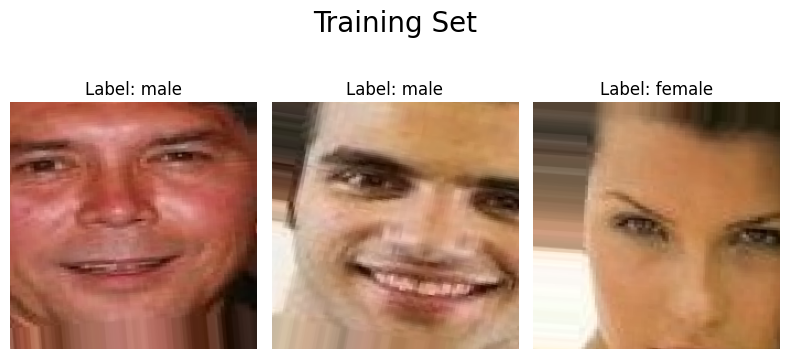

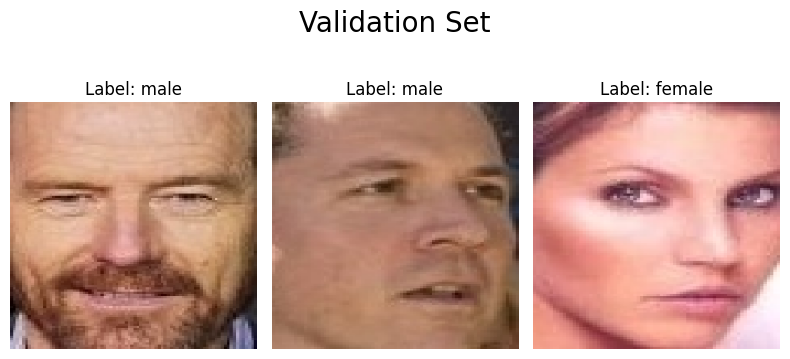

In [12]:
# Function to plot images
def plot_images(images_arr, labels, class_indices, title):
    fig, axes = plt.subplots(1, 3, figsize=(8, 8))
    axes = axes.flatten()

    # Maping numerical labels to class names
    inv_class_indices = {v: k for k, v in class_indices.items()}
    for img, ax, label in zip(images_arr, axes, labels):
        class_name = inv_class_indices[int(label)]
        ax.imshow(img)
        ax.set_title(f'Label: {class_name}')
        ax.axis('off')
    plt.tight_layout()
    plt.subplots_adjust(top=1.4)
    plt.suptitle(title, size=20)
    plt.show()

class_indices = train_generator.class_indices

train_images, train_labels = next(train_generator)
validation_images, validation_labels = next(validation_generator)

plot_images(train_images[:3], train_labels[:3], class_indices, 'Training Set')
plot_images(validation_images[:3], validation_labels[:3], class_indices, 'Validation Set')


In [13]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(target_size[0], target_size[1], 3)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), strides=(1,1), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(128, (3, 3), strides=(1,1), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(256, (3, 3), strides=(1,1), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 batch_normalization_6 (Bat  (None, 222, 222, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 111, 111, 32)      0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 111, 111, 32)      0         
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 batch_normalization_7 (Bat  (None, 109, 109, 64)     

In [14]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=10 
)

Epoch 1/10
737/737 [==============================] - 812s 1s/step - loss: 0.4678 - accuracy: 0.7839 - val_loss: 0.9973 - val_accuracy: 0.6748
Epoch 2/10
737/737 [==============================] - 853s 1s/step - loss: 0.2497 - accuracy: 0.8983 - val_loss: 0.1650 - val_accuracy: 0.9348
Epoch 3/10
737/737 [==============================] - 867s 1s/step - loss: 0.2011 - accuracy: 0.9207 - val_loss: 0.2354 - val_accuracy: 0.9002
Epoch 4/10
737/737 [==============================] - 834s 1s/step - loss: 0.1812 - accuracy: 0.9291 - val_loss: 0.1314 - val_accuracy: 0.9511
Epoch 5/10
737/737 [==============================] - 1197s 2s/step - loss: 0.1699 - accuracy: 0.9347 - val_loss: 0.1157 - val_accuracy: 0.9551
Epoch 6/10
737/737 [==============================] - 2296s 3s/step - loss: 0.1615 - accuracy: 0.9389 - val_loss: 0.3733 - val_accuracy: 0.8553
Epoch 7/10
737/737 [==============================] - 831s 1s/step - loss: 0.1571 - accuracy: 0.9406 - val_loss: 0.1806 - val_accuracy: 0.93

In [15]:
model.save('CNN.h5')

/opt/homebrew/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 96ms/step
Image: male1.jpg, Predicted value: 0.4621
Prediction: This is a female


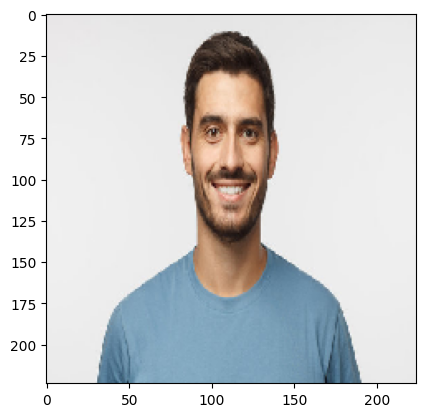

1/1 [==============================] - 0s 20ms/step
Image: man2.jpg, Predicted value: 0.8059
Prediction: This is a male


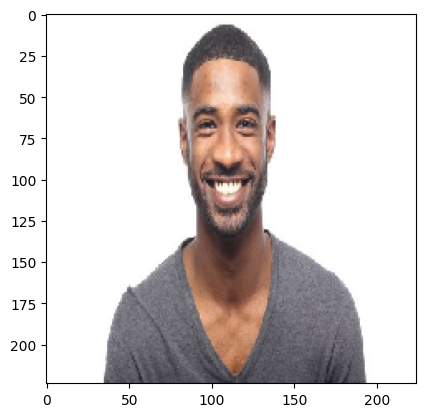

1/1 [==============================] - 0s 18ms/step
Image: female1.jpg, Predicted value: 0.2292
Prediction: This is a female


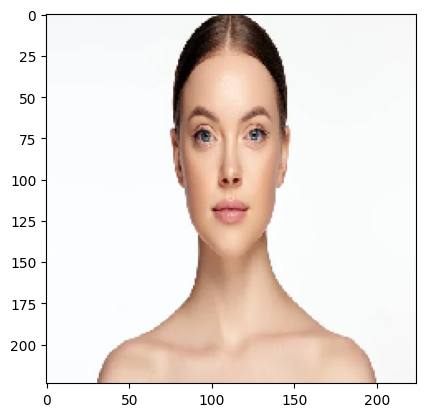

1/1 [==============================] - 0s 21ms/step
Image: woman2.jpg, Predicted value: 0.3188
Prediction: This is a female


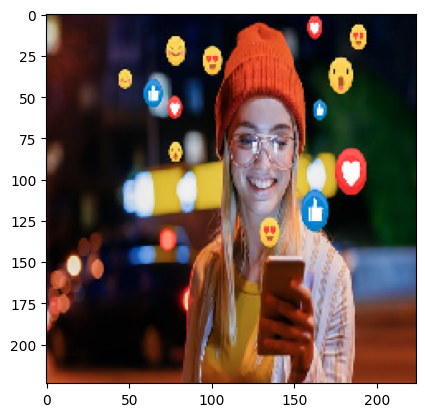

In [16]:
target_size = 224 
folder_path = '//Users/sukanya/Desktop/Gender Classification/Test-Images'

for filename in os.listdir(folder_path):
    if filename.endswith(".jpg") or filename.endswith(".png"):  # Assuming images are JPEG or PNG
        # preprocessing
        img_path = os.path.join(folder_path, filename)
        img = image.load_img(img_path, target_size=(target_size, target_size))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = x / 255.0 

        # Predictions
        predictions = model.predict(x)
        predicted_value = predictions[0, 0]
        
        print(f"Image: {filename}, Predicted value: {predicted_value:.4f}")

        threshold = 0.5  
        if predicted_value > threshold:
            print("Prediction: This is a male")
        else:
            print("Prediction: This is a female")

        plt.imshow(img)
        plt.show()

In [17]:
import requests
from io import BytesIO
from PIL import Image

1/1 [==============================] - 0s 22ms/step
Image URL: https://instagram.fvns1-2.fna.fbcdn.net/v/t51.2885-19/328228206_733195351662866_3465759205145234603_n.jpg?stp=dst-jpg_e0_s150x150&_nc_ht=instagram.fvns1-2.fna.fbcdn.net&_nc_cat=1&_nc_ohc=z99T_zdHZfkQ7kNvgHwCHPP&edm=AOQ1c0wBAAAA&ccb=7-5&oh=00_AYC_Kp67POWjAmkcxxAe1t3cbMnvJ-HbgVKbic5qTxs_9w&oe=66718520&_nc_sid=8b3546, Predicted value: 0.6655
Prediction: This is a male


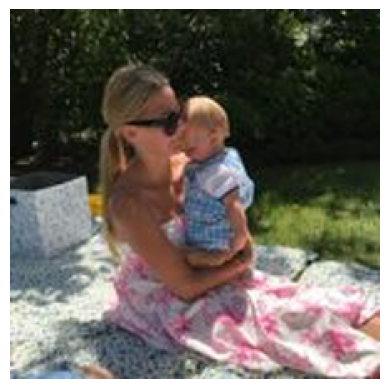

In [22]:
target_size = (224, 224)  # Ensure it's a tuple

# Direct URL of the image you want to test
image_url = "https://instagram.fvns1-2.fna.fbcdn.net/v/t51.2885-19/328228206_733195351662866_3465759205145234603_n.jpg?stp=dst-jpg_e0_s150x150&_nc_ht=instagram.fvns1-2.fna.fbcdn.net&_nc_cat=1&_nc_ohc=z99T_zdHZfkQ7kNvgHwCHPP&edm=AOQ1c0wBAAAA&ccb=7-5&oh=00_AYC_Kp67POWjAmkcxxAe1t3cbMnvJ-HbgVKbic5qTxs_9w&oe=66718520&_nc_sid=8b3546"
response = requests.get(image_url)

# Check if the request was successful and content is an image
if response.status_code == 200:
    # Try to load the image from the response content
    img = Image.open(BytesIO(response.content))
    img = img.resize(target_size)
    
    # Convert image to numpy array
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = x / 255.0
    
    # Predictions
    predictions = model.predict(x)
    predicted_value = predictions[0, 0]
    
    print(f"Image URL: {image_url}, Predicted value: {predicted_value:.4f}")
    
    threshold = 0.5
    if predicted_value > threshold:
        print("Prediction: This is a male")
    else:
        print("Prediction: This is a female")
    
    plt.imshow(img)
    plt.axis('off')
    plt.show()
else:
    print(f"Failed to retrieve image from {image_url}. Status code: {response.status_code}")